In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_data=ImageDataGenerator(rescale=1/255)
test_data= ImageDataGenerator(rescale=1/255) 

In [12]:
train_path = r'E:\Training'
test_path = r'E:\Testing'

In [14]:
train= train_data.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 2870 images belonging to 4 classes.


In [16]:
classes= [x for x in train.class_indices.keys()]
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [18]:
test= test_data.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 394 images belonging to 4 classes.


In [32]:
model= keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),activation= 'relu'),    
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(4,activation='softmax')
    ])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,252 (2.54 MB)

 Trainable params: 665,252 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
report = model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3054 - loss: 1.3735 - val_accuracy: 0.2005 - val_loss: 1.4165
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4469 - loss: 1.3209 - val_accuracy: 0.2107 - val_loss: 1.4829
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4821 - loss: 1.2338 - val_accuracy: 0.2665 - val_loss: 1.7171
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5317 - loss: 1.0948 - val_accuracy: 0.2563 - val_loss: 1.9817
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5714 - loss: 0.9996 - val_accuracy: 0.2589 - val_loss: 2.0223


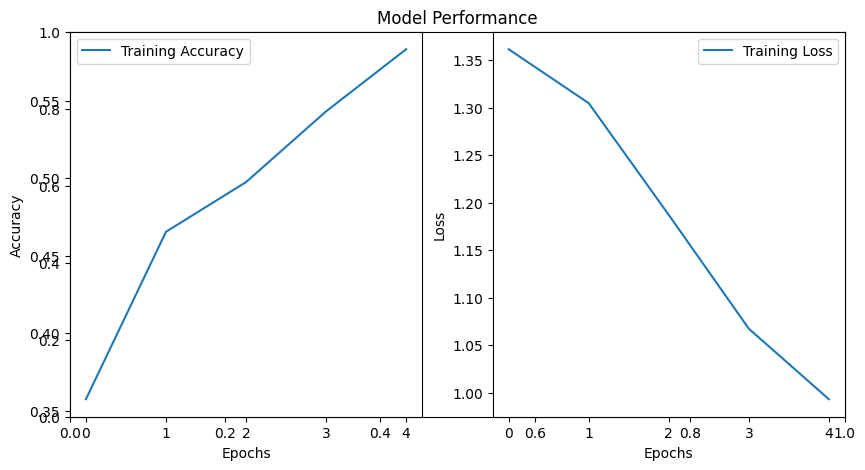

In [36]:
plt.figure(figsize=(10,5))
plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


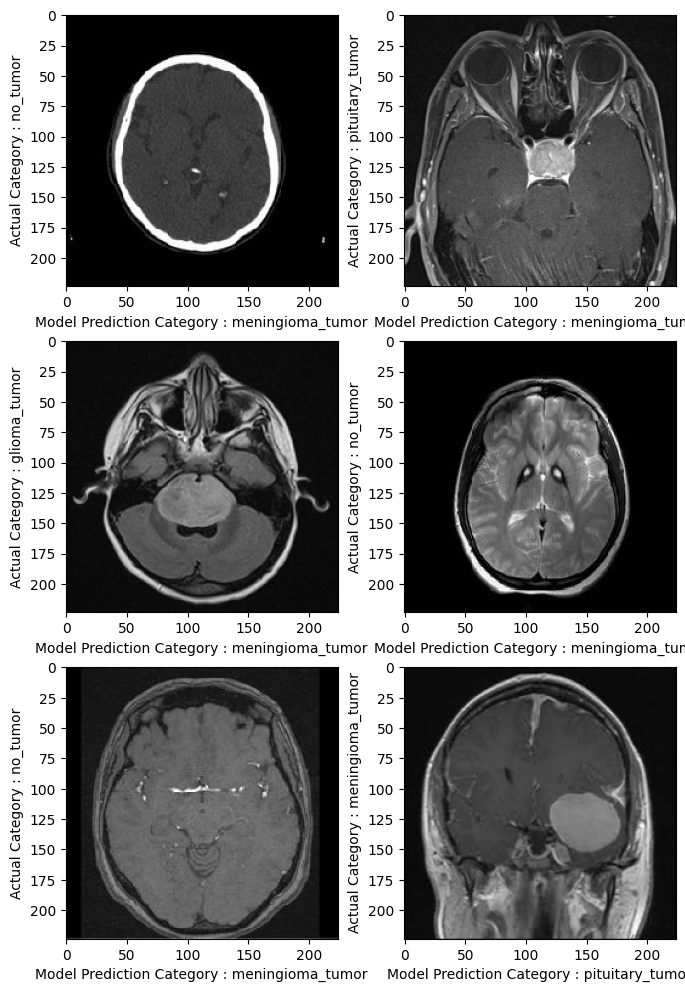

In [37]:
def softmax_to_category(x):
  return np.argmax(x)
     

plt.figure(figsize=(8,12))

for x in range(6, 12):
  plt.subplot(3, 2, x + 1 - 6)
  # Reshape the image to add a batch dimension
  image = test[0][0][x]
  image = np.expand_dims(image, axis=0)  # Add batch dimension

  plt.xlabel(f"Model Prediction Category : {classes[softmax_to_category(model.predict(image))]}")
  plt.ylabel(f"Actual Category : {classes[softmax_to_category(test[0][1][x])]}")
  plt.imshow(test[0][0][x])